In [16]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [17]:
#test_data_path = "/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-002_ses-01_T1W_merge_glmnew/TYPED_FITHRF_GLMDENOISE_RR.npy"
#test_data_path_old = "/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-002_ses-01_T1W_merge_/TYPED_FITHRF_GLMDENOISE_RR.npy"
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-002_ses-01_T1W_merge_glmnew/TYPEC_FITHRF_GLMDENOISE.npy'
fs_dir = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer"


test_data = np.load(test_data_path, allow_pickle=True).item()##
#test_data_old = np.load(test_data_path_old,allow_pickle=True).item()
# print(test_data)


for key in test_data:
    print(key)
# R2 = test_data['onoffR2']
R2 = test_data["R2"]
#R2_old = test_data_old["R2"]
##meanvol = test_data['meanvol']
# noisepool = test_data['noisepool']
HRFindex = test_data["HRFindex"]

print("hrfindxsape", HRFindex.shape)
#fracvalue = test_data["FRACvalue"]


HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
meanvol
hrfindxsape (82, 101, 82)
(82, 101, 82, 720)


(82, 101, 82)



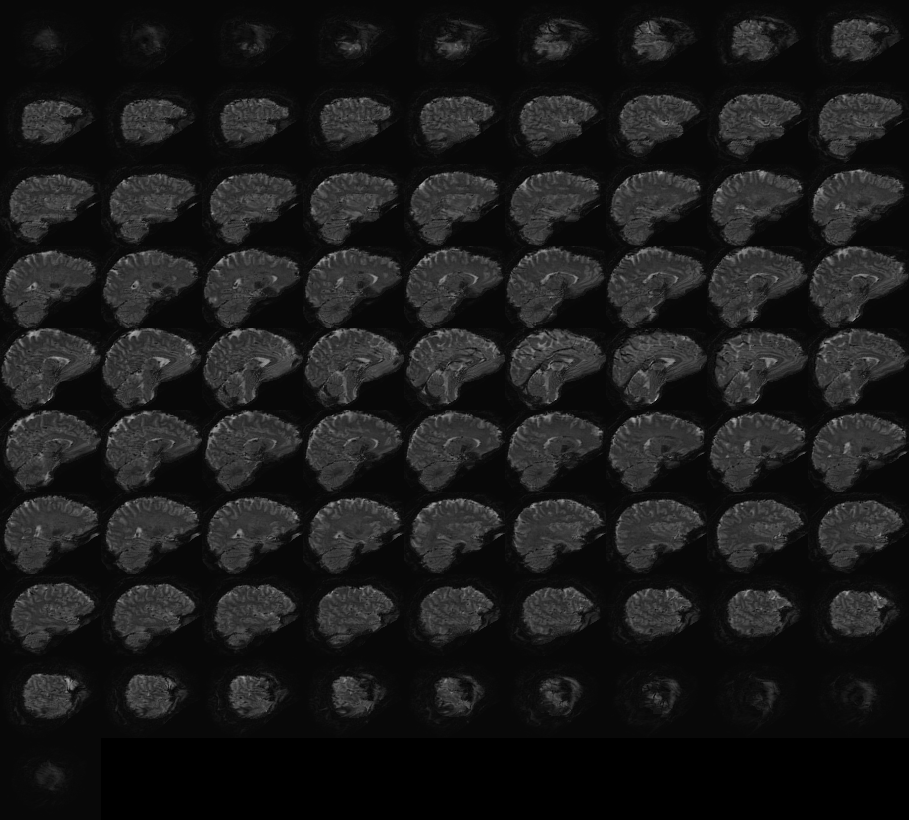
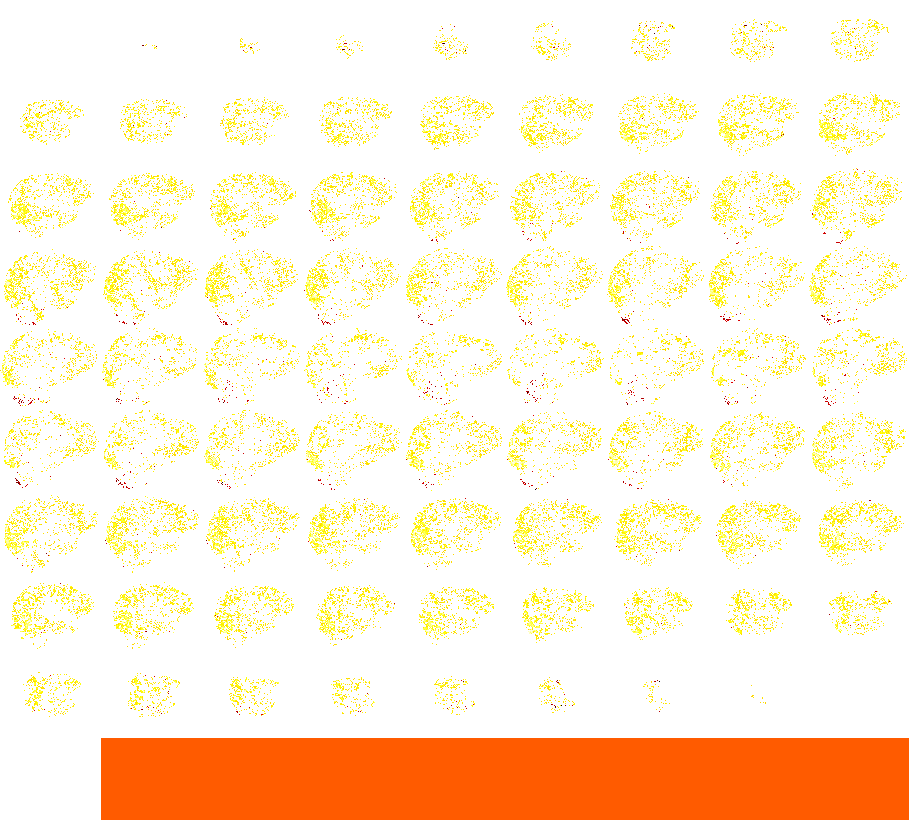

In [18]:
orig_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'


bmask = nib.load(bm_image_fn).get_fdata().astype(bool)

print(bmask.shape)
R2_masked = np.zeros_like(R2)#
R2_masked[bmask] = R2[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(R2_img, threshold=25, vmax=70, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

(82, 101, 82, 720)



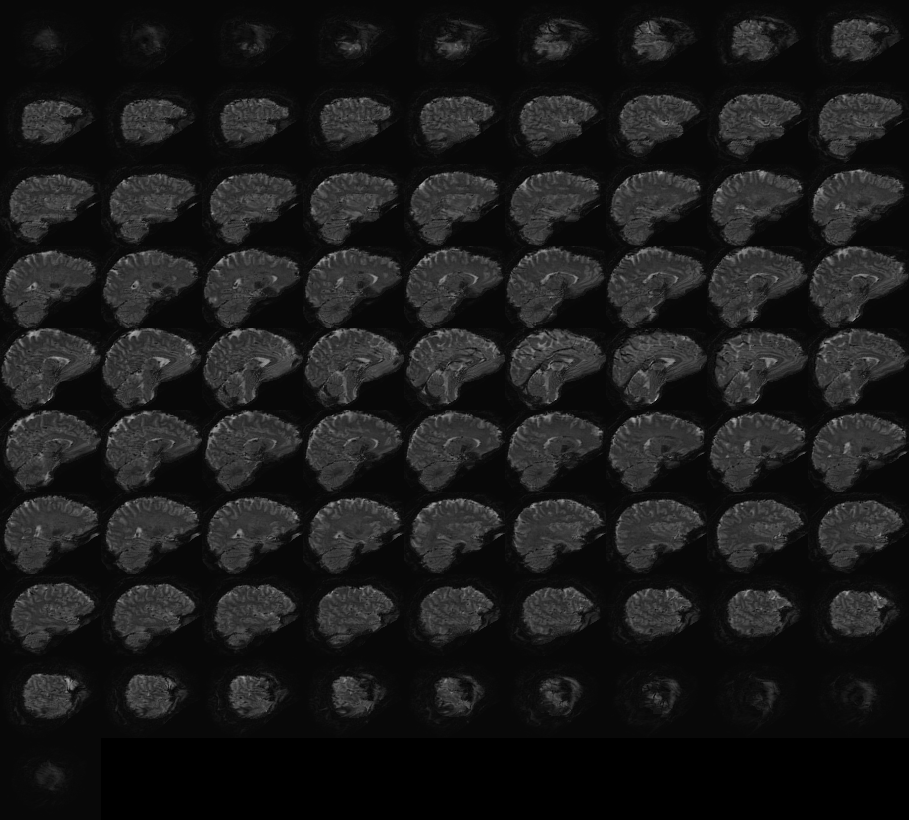
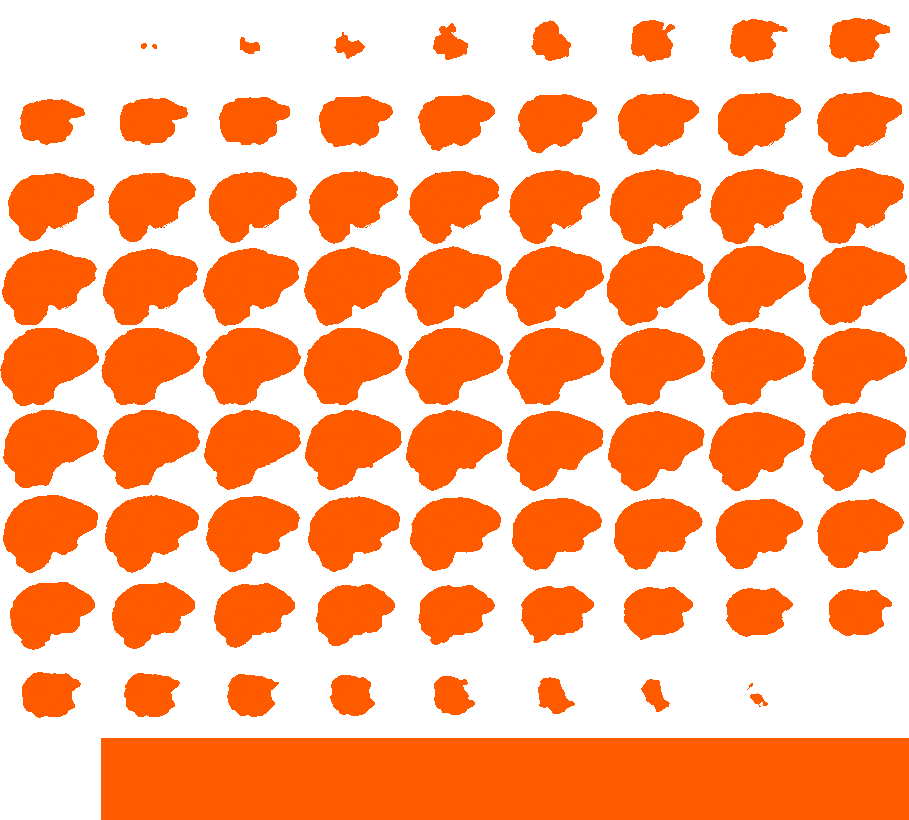

In [19]:
betas = test_data['betasmd']
print(betas.shape)
betamean = np.mean(betas,axis=3)

orig_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
betamean_masked = np.zeros_like(betamean)
betamean_masked[bmask] = betamean[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(betamean_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

In [20]:
fracvalue = test_data['FRACvalue'] 
print(fracvalue.shape) 

orig_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'
print(np.prod(nib.load(bm_image_fn).get_fdata().shape))

#bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
#frac_masked = np.zeros_like(fracvalue)
#frac_masked[bmask] = frac_masked[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


bg_image_fn = nib.load(bg_image_fn)
frac_img = nib.Nifti1Image(fracvalue, affine=orig_image.affine, header=orig_image.header)
#frac_img = nib.Nifti1Image(test_data['rrbadness'].reshape(bg_image_fn.get_fdata().shape), affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(frac_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

KeyError: 'FRACvalue'

In [ ]:
13582480/679124

20.0


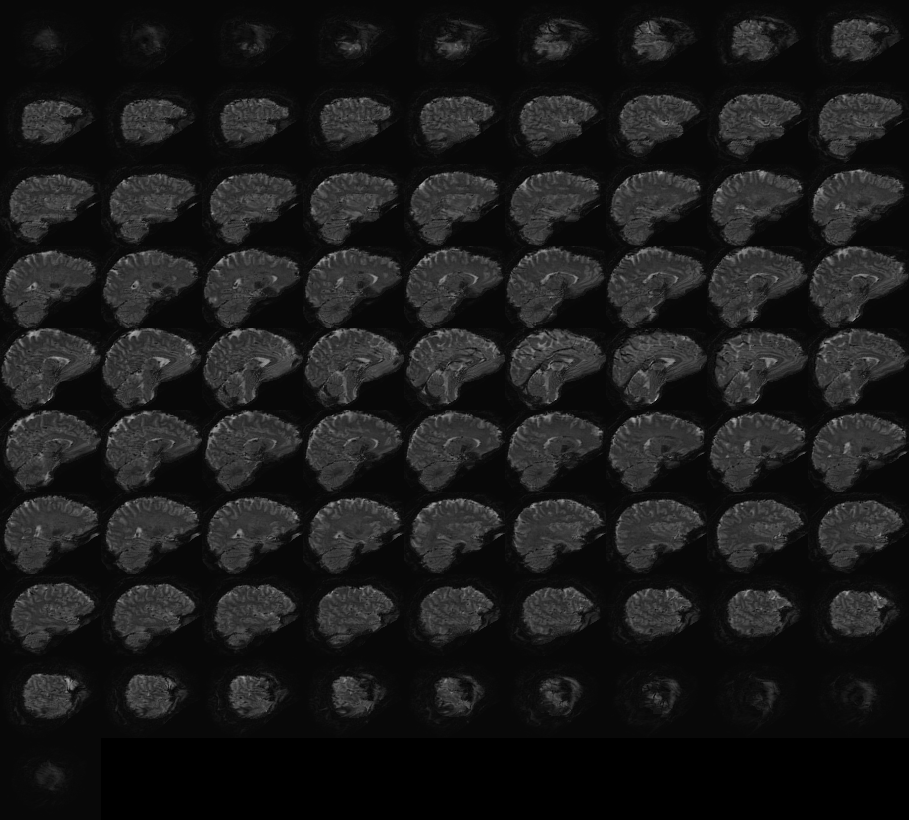
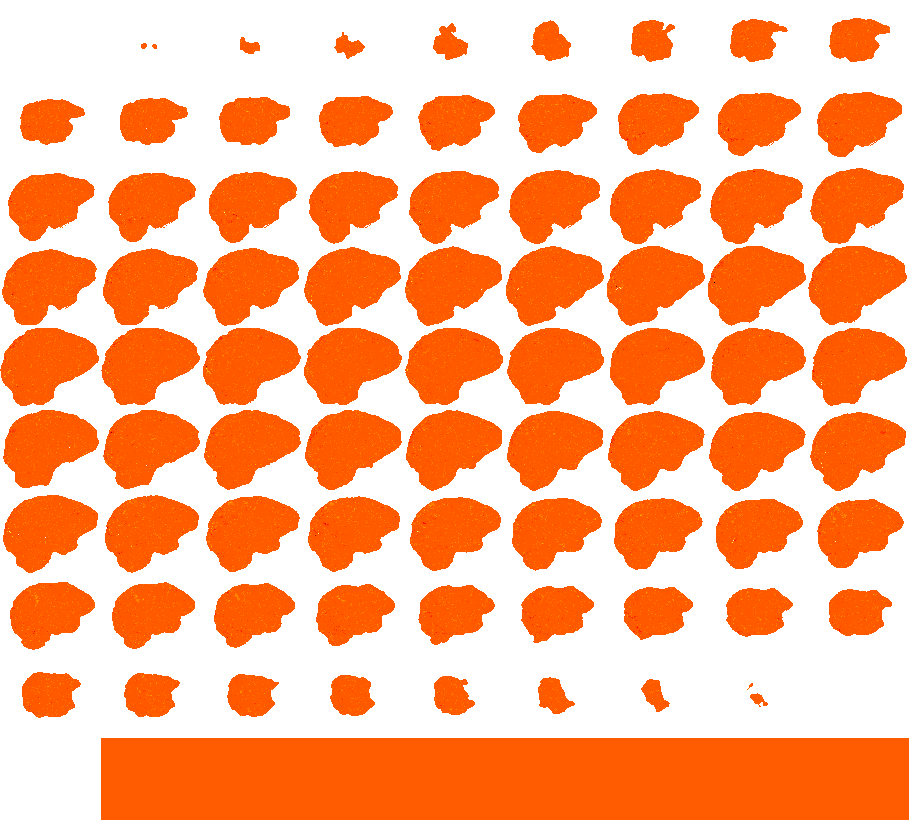

In [ ]:
R2diff = R2 - R2_old
R2diff_masked = np.zeros_like(R2diff)
R2diff_masked[bmask] = R2diff[bmask]
R2diff_img = nib.Nifti1Image(R2diff_masked, affine=orig_image.affine, header=orig_image.header)
view_img(R2diff_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)